In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images
def display_image(title, image):
    plt.figure(figsize=(6, 6))
    if len(image.shape) == 2:  # Grayscale images
        plt.imshow(image, cmap="gray")
    else:  # Color images
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

# Load the image
image_path = "/content/image.png"  # Change this to the actual image path
image = cv2.imread(image_path)

display_image("Original Image (BGR)", image)

# Get Image Properties
height, width, channels = image.shape
print(f"Image Size: Width={width}, Height={height}, Channels={channels}")

total_pixels = height * width
print(f"Total Number of Pixels: {total_pixels}")

# Convert to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite("gray_image.jpg", gray_image)
display_image("Grayscale Image", gray_image)

# Binary Thresholding
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
cv2.imwrite("binary_image.jpg", binary_image)
display_image("Binary Image", binary_image)

# Count Black Pixels
black_pixel_count = np.sum(binary_image == 0)
print(f"Total Black Pixels: {black_pixel_count}")

# Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)
cv2.imwrite("adaptive_threshold.jpg", adaptive_thresh)
display_image("Adaptive Thresholding", adaptive_thresh)

# Watershed Segmentation
# Convert to grayscale and apply Gaussian Blur
gray_blur = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Convert to binary using Otsu's Thresholding
_, binary_watershed = cv2.threshold(gray_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Compute distance transform
dist_transform = cv2.distanceTransform(binary_watershed, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Find sure background by dilation
sure_bg = cv2.dilate(binary_watershed, np.ones((3, 3), np.uint8), iterations=3)

# Subtract sure foreground from sure background
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Label markers for watershed
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply watershed
image_watershed = image.copy()
cv2.watershed(image_watershed, markers)
image_watershed[markers == -1] = [0, 0, 255]  # Mark boundaries in red

cv2.imwrite("watershed_segmentation.jpg", image_watershed)
display_image("Watershed Segmentation", image_watershed)


ModuleNotFoundError: No module named 'cv2'

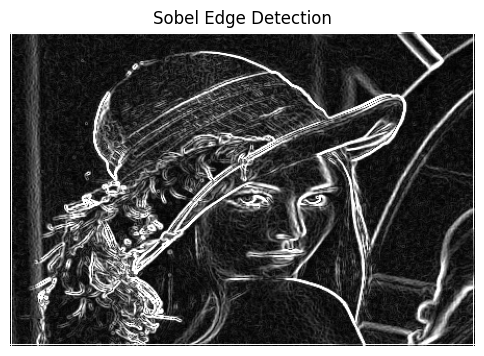

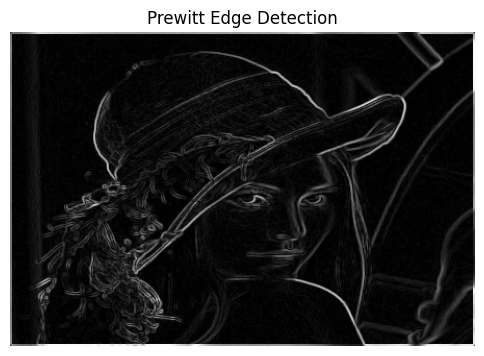

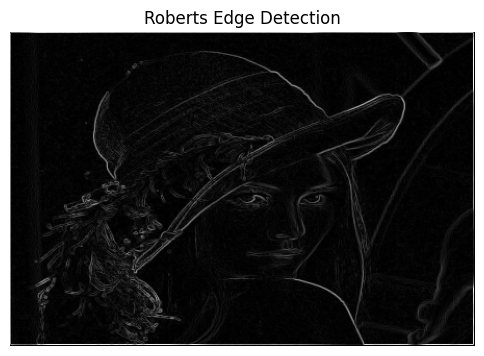

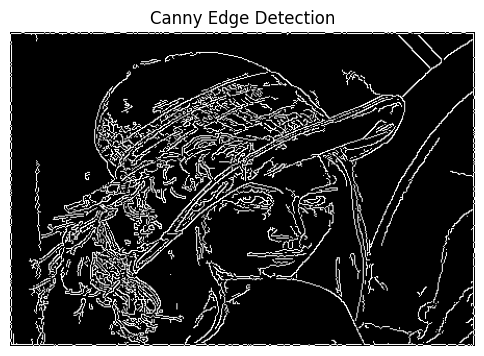

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import prewitt, roberts

def display_image(title, image):
    plt.figure(figsize=(6, 6))
    if image.dtype == np.float64:  
        image = (image / image.max() * 255).astype(np.uint8) 

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB) if len(image.shape) == 3 else image, cmap='gray')  
    plt.title(title)
    plt.axis('off')
    plt.show()

image = cv2.imread('/content/image.png')
if image is None:
    print("Error: Image not found. Please check the file path.")
else:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)

    sobel_combined = cv2.convertScaleAbs(sobel_combined)
    display_image("Sobel Edge Detection", sobel_combined)

    prewitt_edges = prewitt(gray_image)
    
    prewitt_edges = np.uint8(prewitt_edges * 255)
    display_image("Prewitt Edge Detection", prewitt_edges)

    roberts_edges = roberts(gray_image)
    roberts_edges = np.uint8(roberts_edges * 255)
    display_image("Roberts Edge Detection", roberts_edges)

    canny_edges = cv2.Canny(gray_image, 50, 150)
    display_image("Canny Edge Detection", canny_edges)
